# Load libraries

In [114]:
%matplotlib inline

import os
import math

import configparser

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import sys
sys.path.append('../..')

from scripps.utils import read_datasets, norm1d, bayesian_linear_regression
from IPython.core.display import clear_output
import seaborn as sns

In [115]:
np.random.seed(42) 

# Load all mark2cure citizen scientist annotations

In [116]:
CF = read_datasets.get_configuration()

def read_disease_annotations():
    annotations = pd.DataFrame()
    anno = read_datasets.load_dataset('m2c_citizen_disease', 'files1')
    anno[3].replace(['I-Disease', 'O'], [1, 0], inplace=True)
    annotations = pd.concat([annotations, anno[0].rename('Token')], axis=1)
    annotations = pd.concat([annotations, anno[3].rename('Annotator1')], axis=1)
    for i in range(2, 6):
        anno = read_datasets.load_dataset('m2c_citizen_disease', 'files{}'.format(i))
        anno[3].replace(['I-Disease', 'O'], [1, 0], inplace=True)
        annotations = pd.concat([annotations, anno[3].rename('Annotator{}'.format(i))], axis=1)
    return annotations

def read_phenotype_annotations():
    annotations = pd.DataFrame()
    anno = read_datasets.load_dataset('m2c_citizen_phenotype', 'files1')
    anno[3].replace(['I-Phenotype', 'O'], [1, 0], inplace=True)
    annotations = pd.concat([annotations, anno[0].rename('Token')], axis=1)
    annotations = pd.concat([annotations, anno[3].rename('Annotator1')], axis=1)
    for i in range(2, 6):
        anno = read_datasets.load_dataset('m2c_citizen_phenotype', 'files{}'.format(i))
        anno[3].replace(['I-Phenotype', 'O'], [1, 0], inplace=True)
        annotations = pd.concat([annotations, anno[3].rename('Annotator{}'.format(i))], axis=1)
    return annotations

In [117]:
disease_annotations = read_disease_annotations()
phenotype_annotations = read_phenotype_annotations()

In [118]:
disease_annotations

,Token,Annotator1,Annotator2,Annotator3,Annotator4,Annotator5
0,Haematuria,0,0,1,0,1
1,and,0,0,0,0,0
2,abdominal,1,1,1,1,1
3,aortic,1,1,1,1,1
4,aneurysm,1,1,1,1,1
5,.,0,0,0,0,0
6,Haematuria,0,0,1,0,1
7,and,0,0,0,0,0
8,left,0,0,0,0,0
9,loin,0,0,0,0,0


In [119]:
phenotype_annotations

,Token,Annotator1,Annotator2,Annotator3,Annotator4,Annotator5
0,Haematuria,1,1,1,1,1
1,and,0,0,0,0,0
2,abdominal,0,0,0,1,0
3,aortic,0,0,0,1,0
4,aneurysm,0,0,0,1,0
5,.,0,0,0,0,0
6,Haematuria,1,1,1,1,1
7,and,0,0,0,0,0
8,left,1,1,0,0,1
9,loin,1,1,0,1,1


In [120]:
num_annotators = 5
num_tokens = disease_annotations.shape[0]

disease_relevant = pd.DataFrame()
phenotype_relevant = pd.DataFrame()

relevant = []
for k in range(num_tokens):
    disease = 0
    phenotype = 0
    
    for j in range(1, num_annotators+1):                
        d = disease_annotations['Annotator{}'.format(j)][k]
        p = phenotype_annotations['Annotator{}'.format(j)][k]
                
        disease += d 
        phenotype += p
        
    if disease == 0 and phenotype == 0:
        continue
    else:
        relevant.append(k)

relevant = np.array(relevant)
print '{} relevant words.'.format(relevant.size)
disease_relevant = disease_annotations.iloc[relevant]
phenotype_relevant = phenotype_annotations.iloc[relevant]


1611 relevant words.


# Initialize latent variables

In [121]:
K = disease_relevant.shape[0]
J = disease_relevant.shape[1] - 1

latent = {}

latent['theta'] = np.zeros(K)
latent['d_alpha'] = np.zeros(J)
latent['d_beta'] = np.zeros(J)
latent['d_z'] = np.zeros((K, J))

latent['theta'] = np.zeros(K)
latent['p_alpha'] = np.zeros(J)
latent['p_beta'] = np.zeros(J)
latent['p_z'] = np.zeros((K, J))

#Should these be separate for disease and phenotype?
latent['b0'] = np.zeros(2)
latent['B0_scale'] = 1
latent['m0'] = np.zeros(K) #TODO: ask HS regarding changing certain values here.
latent['C0_scale'] = 1

latent['K'] = K
latent['J'] = J

# Define functions for resampling using Gibbs sampling

In [122]:
def __get_alpha_beta_z(mode):
    if mode == 'disease':
        alpha = latent['d_alpha']
        beta = latent['d_beta']
        z = latent['d_z']
    else:
        alpha = latent['p_alpha']
        beta = latent['p_beta']
        z = latent['p_z']
    return alpha, beta, z
    

In [123]:
def __resample_z(alpha, beta, z, annotations):
    interval = [-100, 100] #Should this be changed?
    for k in range(K):
        for j in range(J):
            mean = alpha[j] + beta[j]*latent['theta'][k]
            std_dev = 1
            if(annotations['Annotator{}'.format(j+1)][relevant[k]] == 0):
                z[k, j] = norm1d.truncnormal(mean, std_dev, interval[0], 0)
            elif(annotations['Annotator{}'.format(j+1)][relevant[k]] == 1):
                z[k, j] = norm1d.truncnormal(mean, std_dev, 0, interval[1])
    
def resample_z(mode):
    alpha, beta, z = __get_alpha_beta_z(mode)
    if mode == 'disease':
        annotations = disease_relevant
    else:
        annotations = phenotype_relevant
    __resample_z(alpha, beta, z, annotations)
    return latent['d_z'] if mode == 'disease' else latent['p_z']

In [124]:
def __resample_alpha_beta(alpha, beta, z):
    for j in range(J):
        Y = z[:, j]
        X = np.vstack((np.ones(K), latent['theta'])).T
        
        WN, VN = bayesian_linear_regression.linreg_post(X, Y, latent['b0'], latent['B0_scale'], 1)
        sample = np.random.multivariate_normal(WN, VN)
        alpha[j] = sample[0]
        beta[j] = sample[1]

def resample_alpha_beta(mode):
    alpha, beta, z = __get_alpha_beta_z(mode)
    __resample_alpha_beta(alpha, beta, z)
    return alpha, beta

In [125]:
def resample_theta():
    for k in range(K):                
        Y = np.concatenate((latent['d_z'][k, :] - latent['d_alpha'], latent['p_z'][k, :] - latent['p_alpha']))
        X = np.concatenate((latent['d_beta'], latent['p_beta']))
        X = np.reshape(X, (-1, 1))
        WN, VN = bayesian_linear_regression.linreg_post(X, Y, latent['m0'][k], latent['C0_scale'], 1)
        latent['theta'][k] = np.random.normal(WN, math.sqrt(VN))    

In [126]:
def save_latent_variables():
    #TODO: save to csv.
    pass


def resample():
    d_z = resample_z('disease')
    p_z = resample_z('phenotype')
    
    resample_theta()
        
    d_alpha, d_beta = resample_alpha_beta('disease')
    p_alpha, p_beta = resample_alpha_beta('phenotype')    
    
    save_latent_variables()
    
    return latent['theta'], d_alpha, d_beta, p_alpha, p_beta, d_z, p_z
    
def has_converged():
    #TODO
    pass

def summarize_param(params, burn_in):
    return np.mean(params[burn_in:], axis=0)


def run_sampling(num_iter, burn_in): 
    zs = []
    thetas = []
    d_alphas = []
    d_betas = []
    p_alphas = []
    p_betas = []
    d_zs = []
    p_zs = []
    
    #TODO: consider first step, when we decide if word is relevant or not.
    for it in xrange(1, num_iter+1):
        theta, d_alpha, d_beta, p_alpha, p_beta, d_z, p_z = resample()
        thetas.append(np.array(theta))
        d_alphas.append(np.array(d_alpha))
        d_betas.append(np.array(d_beta))
        p_alphas.append(np.array(p_alpha))
        p_betas.append(np.array(p_beta))
        d_zs.append(np.array(d_z))
        p_zs.append(np.array(p_z))
        
        if it%5 == 0:
            clear_output()
            print 'Iter {}/{} done.'.format(it, num_iter)
        if has_converged():
            break
    
    all_vars = {}            
    all_vars['thetas'] = thetas
    all_vars['d_alphas'] = d_alphas
    all_vars['d_betas'] = d_betas
    all_vars['p_alphas'] = p_alphas
    all_vars['p_betas'] = p_betas
    all_vars['d_zs'] = d_zs
    all_vars['p_zs'] = p_zs
    
    summary = {}                  
    summary['avg_d_alpha'] = summarize_param(d_alphas, burn_in)
    summary['avg_d_beta'] = summarize_param(d_betas, burn_in)
    summary['avg_p_alpha'] = summarize_param(p_alphas, burn_in)
    summary['avg_p_beta'] = summarize_param(p_betas, burn_in)
    summary['avg_theta'] = summarize_param(thetas, burn_in)    
    summary['avg_d_z'] = summarize_param(d_zs, burn_in)    
    summary['avg_p_z'] = summarize_param(p_zs, burn_in)    
      
    return all_vars, summary

In [127]:
all_vars, summary = run_sampling(2000, 200)

Iter 2000/2000 done.


In [128]:
print 'avg_d_alpha:', summary['avg_d_alpha']
print 'avg_d_beta:', summary['avg_d_beta']
print 'avg_p_alpha:', summary['avg_p_alpha']
print 'avg_p_beta:', summary['avg_p_beta']
print 'avg_theta:', summary['avg_theta']

avg_d_alpha: [-0.64793665 -0.66841205 -1.03080261 -1.17311404  0.10613913]
avg_d_beta: [-2.13255875 -1.94533185 -2.07818461 -1.98619177 -2.48278841]
avg_p_alpha: [-0.96249539 -0.94193719 -0.83159624 -0.50720435 -0.56417771]
avg_p_beta: [-0.09336987 -0.10496899 -0.26546024 -0.37496885  3.01909242]
avg_theta: [ 0.01204559 -1.42571659 -1.46427702 ... -1.46337619 -1.3604821
 -1.21114576]


In [129]:
def get_annotator_bias(alpha, beta):
    # compute xr and xa using above latent vars.
#     xa = (4*alpha - beta*beta)/(4*beta)
#     xr = (4*alpha + beta*beta)/(4*beta)
    xa = (-2*alpha/beta - beta/2)/2
    xr = -2*alpha/beta - xa
    return xa, xr

def get_word_positions(theta, relevant):
    positions = pd.DataFrame()
    positions['Tokens'] = disease_annotations['Token']    
    for i in range(1, J+1):
        codes = disease_annotations['Annotator{}'.format(i)].map(str) + \
        phenotype_annotations['Annotator{}'.format(i)].map(str)        
        positions['Annotator{}'.format(i)] = codes
        positions['Annotator{}'.format(i)].\
        replace(['00', '01', '10', '11'], ['None', 'Phenotype', 'Disease', 'Both'], inplace=True)
    
    disease_counts = np.zeros(len(disease_annotations['Token']), dtype=np.int32)
    phenotype_counts = np.zeros(len(phenotype_annotations['Token']), dtype=np.int32)
    for i in range(1, J+1):
        disease_counts += positions['Annotator{}'.format(i)].\
        replace(['Disease', 'Both', 'Phenotype', 'None'], [1, 1, 0, 0])
        phenotype_counts += positions['Annotator{}'.format(i)].\
        replace(['Phenotype', 'Both', 'Disease', 'None'], [1, 1, 0, 0])
    
    positions['Disease'] = disease_counts
    positions['Phenotype'] = phenotype_counts
    
    positions['Position'] = ''
    positions['Position'].iloc[relevant] = theta    
    
    return positions

def plot_bias():
    # show the annotator's location along with the word's true position.
    pass


In [130]:
def alignment_to_expert_positions():
    pass

In [131]:
xpa, xpr = get_annotator_bias(summary['avg_p_alpha'], summary['avg_p_beta'])

In [132]:
xda, xdr = get_annotator_bias(summary['avg_d_alpha'], summary['avg_d_beta'])

In [133]:
xpa - xpr

array([ 0.04668493,  0.05248449,  0.13273012,  0.18748443, -1.50954621])

In [134]:
xda - xdr

array([1.06627937, 0.97266593, 1.03909231, 0.99309588, 1.2413942 ])

In [135]:
(xpa + xpr)/2

array([-10.30841554,  -8.97348053,  -3.13265836,  -1.35265728,
         0.18686997])

In [136]:
(xda + xdr)/2

array([-0.30383062, -0.34359796, -0.49601109, -0.59063483,  0.04274997])

In [137]:
print min(summary['avg_theta'])
print max(summary['avg_theta'])

-1.773398866615268
1.4012920099636075


In [138]:
positions = get_word_positions(summary['avg_theta'], relevant)

In [139]:
positions

,Tokens,Annotator1,Annotator2,Annotator3,Annotator4,Annotator5,Disease,Phenotype,Position
0,Haematuria,Phenotype,Phenotype,Both,Phenotype,Both,2,5,0.0120456
1,and,None,None,None,None,None,0,0,
2,abdominal,Disease,Disease,Disease,Both,Disease,5,1,-1.42572
3,aortic,Disease,Disease,Disease,Both,Disease,5,1,-1.46428
4,aneurysm,Disease,Disease,Disease,Both,Disease,5,1,-1.41945
5,.,None,None,None,None,None,0,0,
6,Haematuria,Phenotype,Phenotype,Both,Phenotype,Both,2,5,-0.0161885
7,and,None,None,None,None,None,0,0,
8,left,Phenotype,Phenotype,None,None,Phenotype,0,3,1.02504
9,loin,Phenotype,Phenotype,None,Phenotype,Phenotype,0,4,0.761321


In [140]:
relevant_positions = pd.DataFrame(positions.iloc[relevant]).reset_index()

In [141]:
relevant_positions

,index,Tokens,Annotator1,Annotator2,Annotator3,Annotator4,Annotator5,Disease,Phenotype,Position
0,0,Haematuria,Phenotype,Phenotype,Both,Phenotype,Both,2,5,0.0120456
1,2,abdominal,Disease,Disease,Disease,Both,Disease,5,1,-1.42572
2,3,aortic,Disease,Disease,Disease,Both,Disease,5,1,-1.46428
3,4,aneurysm,Disease,Disease,Disease,Both,Disease,5,1,-1.41945
4,6,Haematuria,Phenotype,Phenotype,Both,Phenotype,Both,2,5,-0.0161885
5,8,left,Phenotype,Phenotype,None,None,Phenotype,0,3,1.02504
6,9,loin,Phenotype,Phenotype,None,Phenotype,Phenotype,0,4,0.761321
7,10,pain,Phenotype,Phenotype,Both,Phenotype,Phenotype,1,5,0.217514
8,15,abdominal,Disease,Disease,Disease,Both,Disease,5,1,-1.37708
9,16,aortic,Disease,Disease,Disease,Both,Disease,5,1,-1.44169


In [142]:
def plot_thetas(pos_annos, annotator):
    pos_annos['zeros'] = 0
    ax = sns.scatterplot(x=pos_annos['Position'], y="zeros", hue=annotator, data=pos_annos, hue_order=['Disease', 'Both', 'Phenotype', 'None'])

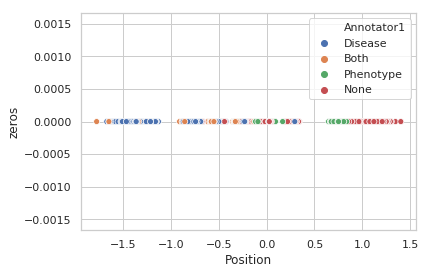

In [143]:
plot_thetas(relevant_positions, 'Annotator1')

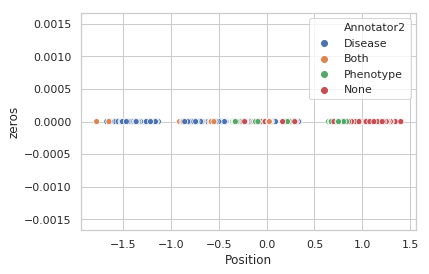

In [144]:
plot_thetas(relevant_positions, 'Annotator2')

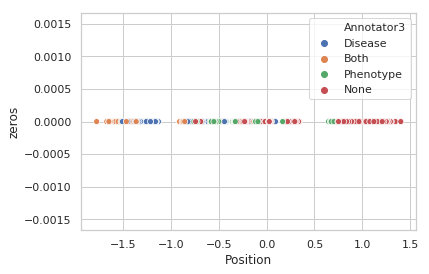

In [145]:
plot_thetas(relevant_positions, 'Annotator3')

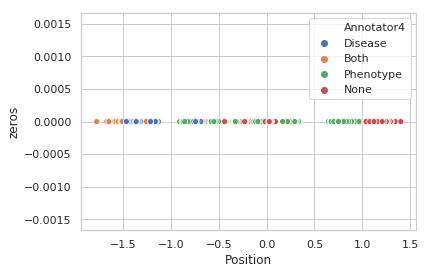

In [146]:
plot_thetas(relevant_positions, 'Annotator4')

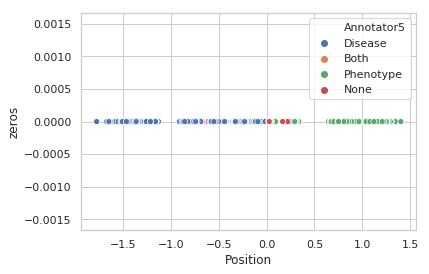

In [147]:
plot_thetas(relevant_positions, 'Annotator5')

In [148]:
loc_pd = pd.DataFrame()
#loc_pd['Val'] = ["xda", "xdr", "xpa", "xpr"]
#
#for i in range(5):
#    loc_pd['Annotator{}'.format(i+1)] = [xda[i], xdr[i], xpa[i], xpr[i]]

#loc_pd.index = ["xda", "xdr", "xpa", "xpr"]
loc_pd['xda'] = xda
loc_pd['xdr'] = xdr
loc_pd['xpa'] = xpa
loc_pd['xpr'] = xpr
loc_pd['annotator'] = ['Annotator{}'.format(i+1) for i in range(5)]
#ax = sns.scatterplot(x=0, y="zeros", data=dis_loc_pd)

In [149]:
loc_pd

,xda,xdr,xpa,xpr,annotator
0,0.229309,-0.836970,-10.285073,-10.331758,Annotator1
1,0.142735,-0.829931,-8.947238,-8.999723,Annotator2
2,0.023535,-1.015557,-3.066293,-3.199023,Annotator3
3,-0.094087,-1.087183,-1.258915,-1.446399,Annotator4
4,0.663447,-0.577947,-0.567903,0.941643,Annotator5


### '''
loc_pd = pd.DataFrame()
#loc_pd['disease'] = (xda + xdr)/2
#loc_pd['phenotype'] = (xpa + xpr)/2
loc_pd['disease'] = xda
loc_pd['phenotype'] = xpa
loc_pd['annotator'] = ['Annotator{}'.format(i+1) for i in range(5)]
'''
dis_pd = pd.DataFrame()
dis_pd['xda'] = xda
dis_pd['xdr'] = xdr
dis_pd['annotator'] = ['Annotator{}'.format(i+1) for i in range(5)]

phe_pd = pd.DataFrame()
phe_pd['xpa'] = xpa
phe_pd['xpr'] = xpr
phe_pd['annotator'] = ['Annotator{}'.format(i+1) for i in range(5)]
#'''

sns.set(style="whitegrid")

dis_pd = pd.melt(dis_pd, "annotator", var_name="measurement")
phe_pd = pd.melt(phe_pd, "annotator", var_name="measurement")

print(dis_pd)
print
print(phe_pd)

f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.pointplot(x="value", y="annotator", hue="measurement",
              data=dis_pd, dodge=0, join=False,
              markers="o", scale=1, ci=None)

sns.pointplot(x="value", y="annotator", hue="measurement",
              data=phe_pd, dodge=0, join=False,
              markers="x", scale=1, ci=None)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


    annotator measurement     value
0  Annotator1         xda  0.229309
1  Annotator2         xda  0.142735
2  Annotator3         xda  0.023535
3  Annotator4         xda -0.094087
4  Annotator5         xda  0.663447
5  Annotator1         xdr -0.836970
6  Annotator2         xdr -0.829931
7  Annotator3         xdr -1.015557
8  Annotator4         xdr -1.087183
9  Annotator5         xdr -0.577947

    annotator measurement      value
0  Annotator1         xpa -10.285073
1  Annotator2         xpa  -8.947238
2  Annotator3         xpa  -3.066293
3  Annotator4         xpa  -1.258915
4  Annotator5         xpa  -0.567903
5  Annotator1         xpr -10.331758
6  Annotator2         xpr  -8.999723
7  Annotator3         xpr  -3.199023
8  Annotator4         xpr  -1.446399
9  Annotator5         xpr   0.941643


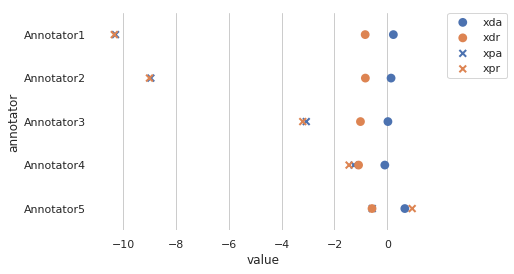

In [150]:
'''
loc_pd = pd.DataFrame()
#loc_pd['disease'] = (xda + xdr)/2
#loc_pd['phenotype'] = (xpa + xpr)/2
loc_pd['disease'] = xda
loc_pd['phenotype'] = xpa
loc_pd['annotator'] = ['Annotator{}'.format(i+1) for i in range(5)]
'''
dis_pd = pd.DataFrame()
dis_pd['xda'] = xda
dis_pd['xdr'] = xdr
dis_pd['annotator'] = ['Annotator{}'.format(i+1) for i in range(5)]

phe_pd = pd.DataFrame()
phe_pd['xpa'] = xpa
phe_pd['xpr'] = xpr
phe_pd['annotator'] = ['Annotator{}'.format(i+1) for i in range(5)]
#'''

sns.set(style="whitegrid")

dis_pd = pd.melt(dis_pd, "annotator", var_name="measurement")
phe_pd = pd.melt(phe_pd, "annotator", var_name="measurement")

print(dis_pd)
print
print(phe_pd)

f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.pointplot(x="value", y="annotator", hue="measurement",
              data=dis_pd, dodge=0, join=False,
              markers="o", scale=1, ci=None)

sns.pointplot(x="value", y="annotator", hue="measurement",
              data=phe_pd, dodge=0, join=False,
              markers="x", scale=1, ci=None)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [151]:
dis_loc = (xda + xdr)/2
phe_loc = (xpa + xpr)/2

phe_loc - dis_loc

array([-10.00458492,  -8.62988257,  -2.63664727,  -0.76202245,
         0.14412   ])

In [152]:
def count_relevant_stats(relevant_annotations, annotator, label):
    return relevant_annotations[relevant_annotations[annotator] == label][annotator].count()

In [153]:
def get_relevant_stats(relevant_annotations, annotator):
    print 'Statistics for {}'.format(annotator)
    print 'Percentage of Disease labels: {:.4f}'.format(count_relevant_stats(relevant_annotations, annotator, 'Disease')/float(len(relevant)))
    print 'Percentage of Phenotype labels: {:.4f}'.format(count_relevant_stats(relevant_annotations, annotator, 'Phenotype')/float(len(relevant)))
    print 'Percentage of Both labels: {:.4f}'.format(count_relevant_stats(relevant_annotations, annotator, 'Both')/float(len(relevant)))
    print 'Percentage of relevant None labels: {:.4f}'.format(count_relevant_stats(relevant_annotations, annotator, 'None')/float(len(relevant)))

In [154]:
get_relevant_stats(relevant_positions, 'Annotator1')

Statistics for Annotator1
Percentage of Disease labels: 0.3215
Percentage of Phenotype labels: 0.0894
Percentage of Both labels: 0.0795
Percentage of relevant None labels: 0.5096


In [155]:
get_relevant_stats(relevant_positions, 'Annotator2')

Statistics for Annotator2
Percentage of Disease labels: 0.3501
Percentage of Phenotype labels: 0.1372
Percentage of Both labels: 0.0379
Percentage of relevant None labels: 0.4749


In [156]:
get_relevant_stats(relevant_positions, 'Annotator3')

Statistics for Annotator3
Percentage of Disease labels: 0.2427
Percentage of Phenotype labels: 0.1198
Percentage of Both labels: 0.0906
Percentage of relevant None labels: 0.5469


In [157]:
get_relevant_stats(relevant_positions, 'Annotator4')

Statistics for Annotator4
Percentage of Disease labels: 0.1850
Percentage of Phenotype labels: 0.2011
Percentage of Both labels: 0.1173
Percentage of relevant None labels: 0.4966


In [158]:
get_relevant_stats(relevant_positions, 'Annotator5')

Statistics for Annotator5
Percentage of Disease labels: 0.4997
Percentage of Phenotype labels: 0.3886
Percentage of Both labels: 0.0286
Percentage of relevant None labels: 0.0832
